# Medical Cost Personal Data Sets

### Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Read Data

In [4]:
results_df = pd.read_csv('insurance.csv')
results_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Understanding

In [6]:
results_df.shape

(1338, 7)

In [7]:
results_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
results_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
results_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation 

In [10]:
# Example of dropping columns
# df.drop(['Opening date'], axis=1)

In [12]:
results_df = results_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].copy()

In [21]:
#rename columns
results_df = results_df.rename(columns = {'age' : 'Age', 'sex' : 'Sex', 'bmi' : 'Bmi', 'smoker' : 'Smoker',
                                          'children' : 'Children', 
                                          'region' : 'Region',
                                         'charges' : 'Charges'})
results_df.head()

,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
#check for nan values
results_df.isna().sum()

Age         0
Sex         0
Bmi         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

In [24]:
#check for duplicated data
results_df.loc[results_df.duplicated()]

,Age,Sex,Bmi,Children,Smoker,Region,Charges
581,19,male,30.59,0,no,northwest,1639.5631


In [27]:
#check for duplicated charges
results_df.loc[results_df.duplicated(subset = ['Charges'])].head(5)

,Age,Sex,Bmi,Children,Smoker,Region,Charges
581,19,male,30.59,0,no,northwest,1639.5631


In [28]:
#checking for example duplicate
results_df.query('Charges == 1639.5631')

,Age,Sex,Bmi,Children,Smoker,Region,Charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [29]:
#copy a new data with no duplicates
results_df = results_df.loc[~results_df.duplicated(subset = ['Charges'])].reset_index(drop = True).copy()

# Feature Understanding

### (Univariate analysis)

* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot 

In [31]:
results_df['Age'].value_counts().head(10)

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: Age, dtype: int64

Text(0.5, 0, 'Age Range')

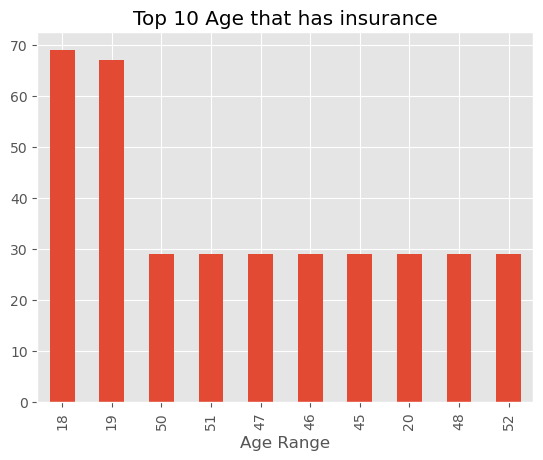

In [41]:
#plot data
axis = results_df['Age'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Age that has insurance')
axis.set_xlabel('Age Range')

Text(0.5, 0, 'Body Mass Index (Bmi)')

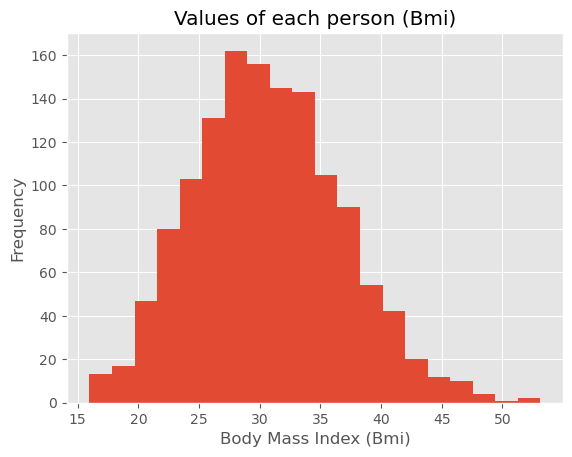

In [50]:
axis = results_df['Bmi'].plot(kind = 'hist', bins = 20, title = 'Values of each person (Bmi)')
axis.set_xlabel('Body Mass Index (Bmi)')

Text(0.5, 0, 'Body Mass Index (Bmi)')

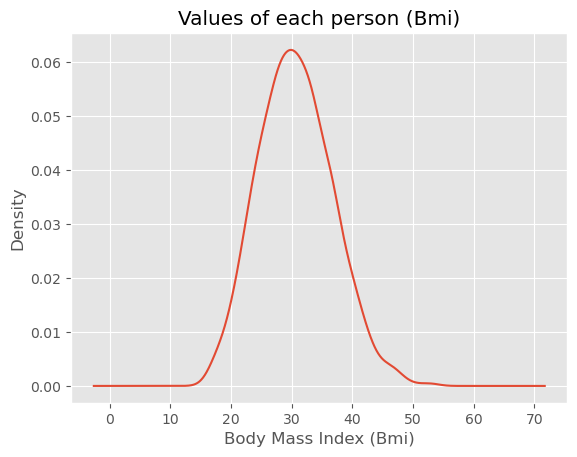

In [52]:
#check data for kernel density
axis = results_df['Bmi'].plot(kind = 'kde', title = 'Values of each person (Bmi)')
axis.set_xlabel('Body Mass Index (Bmi)')

In [80]:
results_df['Children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

# Relationship Features

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [56]:
results_df.head()

,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


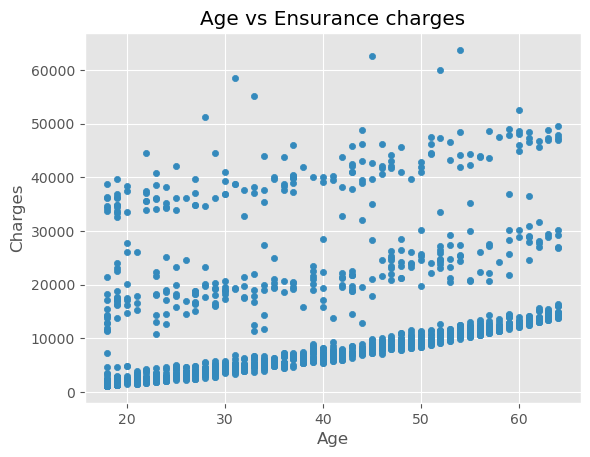

In [61]:
results_df.plot(kind = 'scatter', x = 'Age', y = 'Charges', title = 'Age vs Ensurance charges')
plt.show()

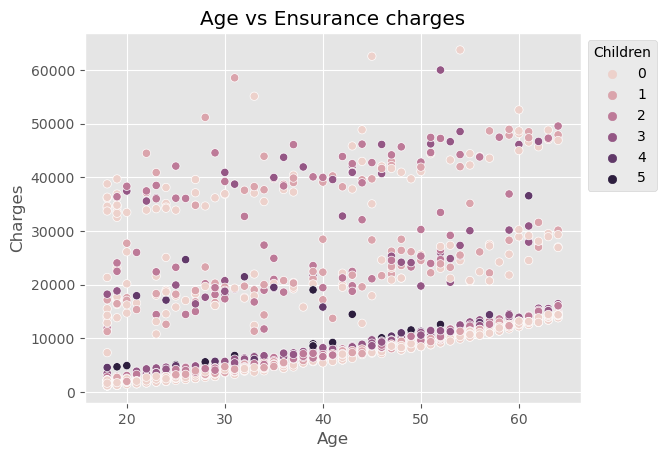

In [65]:
axis = sns.scatterplot(x = 'Age', y = 'Charges', hue = 'Children', data = results_df)
sns.move_legend(axis, "upper left", bbox_to_anchor=(1, 1))
axis.set_title('Age vs Ensurance charges')
plt.show()

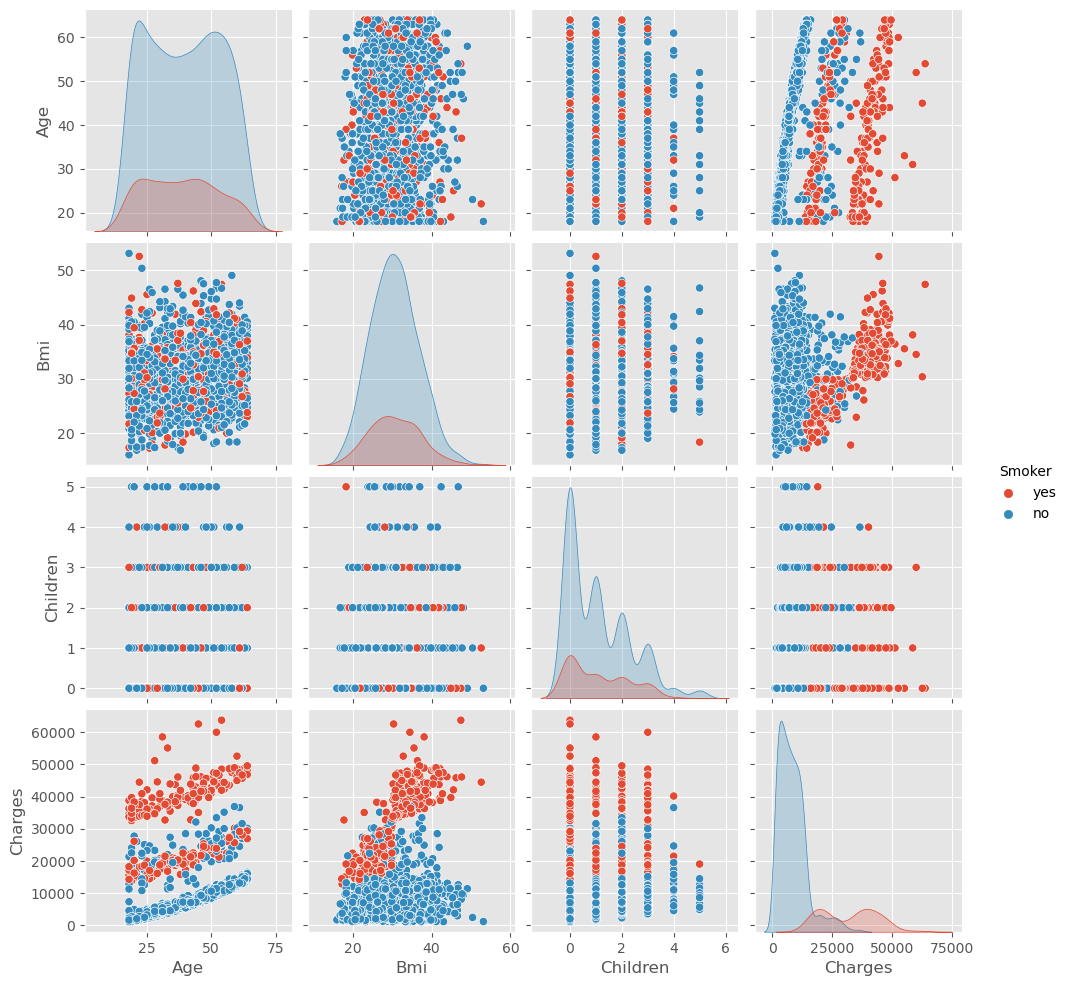

In [66]:
sns.pairplot(results_df, vars =  ['Age', 'Bmi', 'Children', 'Charges'], hue = 'Smoker')
plt.show()

In [67]:
resuts_corr = results_df[['Age', 'Bmi', 'Children', 'Charges']].dropna().corr()
resuts_corr

,Age,Bmi,Children,Charges
Age,1.000000,0.109344,0.041536,0.298308
Bmi,0.109344,1.000000,0.012755,0.198401
Children,0.041536,0.012755,1.000000,0.067389
Charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

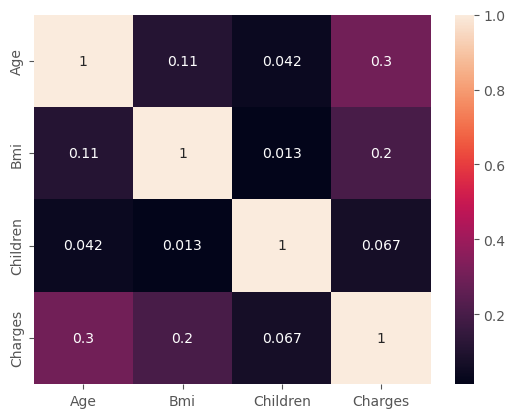

In [68]:
sns.heatmap(resuts_corr, annot = True)

# Ask Question about the Data

* Try to answer a question you have about the data using a plot or statistic.

What Region is the highest Charges?

What Sex are with the highest Charges?

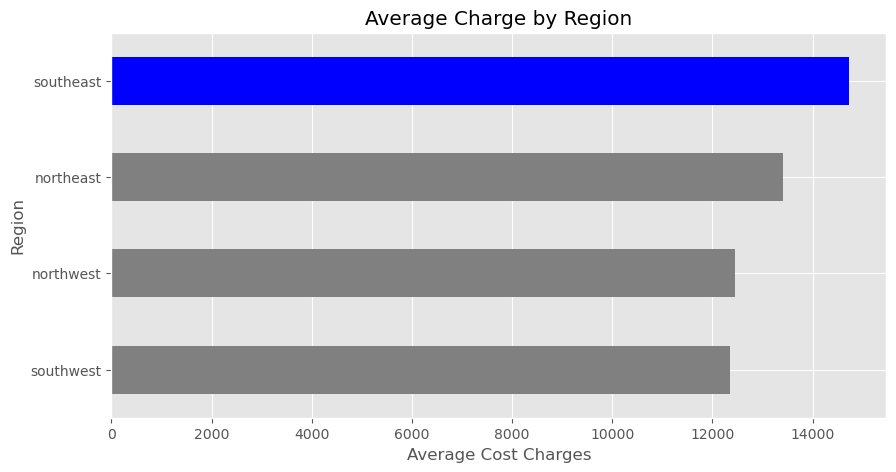

In [98]:
axis = results_df.query('Region != "Other"').groupby('Region')['Charges'].agg(['mean']).sort_values('mean')['mean'] \
    .plot(kind = 'barh', figsize=(10, 5), color = ['grey', 'grey', 'grey', 'blue'], title='Average Charge by Region')
axis.set_xlabel('Average Cost Charges')
plt.show()

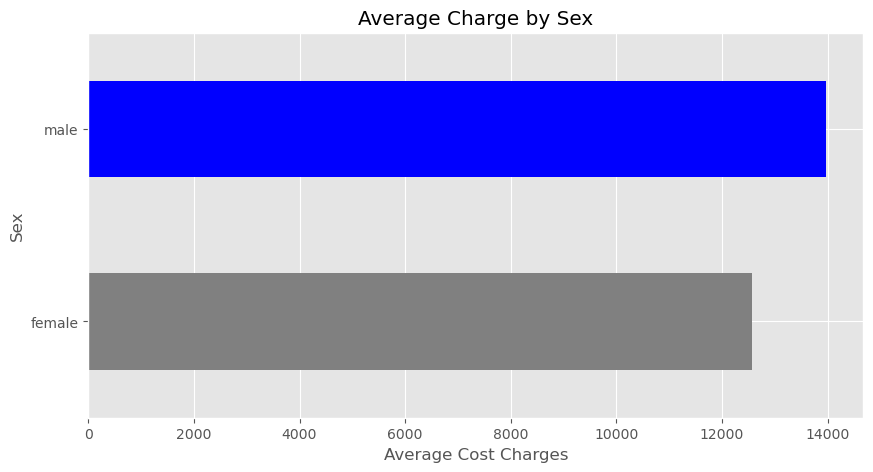

In [95]:
axis = results_df.query('Sex != "Other"').groupby('Sex')['Charges'].agg(['mean', 'count']).query('count >= 10').sort_values('mean')['mean'] \
    .plot(kind = 'barh', figsize=(10, 5), color = ['grey', 'blue'], title='Average Charge by Sex')
axis.set_xlabel('Average Cost Charges')
plt.show()